# **Trabajo final - Aprenizaje de máquinas**

## Multiclass classification of dry beans using machine learning techniques

Estudiantes:
* Gladis Carmona Pedraza CC 43983972
* Camila Arbeláez Vélez CC 1036959719
* Juan Pablo Botero Aguirre CC 98714459

# Descripción del conjunto de datos

Este conjunto de datos cuenta con 13,611 instancias y 17 atributos de siete tipos diferentes de frijoles secos, tomando en cuenta las características de dimensión y estructura (12  atributos de dimensiones, 4 atributos de forma de los granos y 1 de clase).


Información de los atributos:
* 1. Área (A): el área de una zona de fríjoles y el número de pixeles dentro de sus límites.
* 2. Perímetro (P): La circunferencia del frijol se define como la longitud de su borde.
* 3. Longitud del eje mayor (L): la distancia entre los extremos de la línea más larga que se puede dibujar de un frijol.
* 4. Longitud del eje menor (l): la línea más larga que se puede trazar desde el frijol estando perpendicular al eje principal.
* 5. Relación de aspecto (K): define la relación entre L y l.
* 6. Excentricidad (Ec): Excentricidad de la elipse que tiene los mismos momentos que la región.
* 7. Área convexa (C): número de píxeles en el polígono convexo más pequeño que puede contener el área de una semilla de frijol.
* 8. Diámetro equivalente (Ed): El diámetro de un círculo que tiene la misma área que el área de una semilla de frijol.
* 9. Extensión (Ex): la relación entre los píxeles del cuadro delimitador y el área del frijol.
* 10. Solidez (S): También conocida como convexidad. La relación entre los píxeles de la cáscara convexa y los que se encuentran en los frijoles.
* 11. Redondez (R): Calculado con la siguiente fórmula: (4piA)/(P^2)
* 12. Compacidad (CO): mide la redondez de un objeto: Ed/L
* 13. ShapeFactor1 (SF1)
* 14. ShapeFactor2 (SF2)
* 15. ShapeFactor3 (SF3)
* 16. ShapeFactor4 (SF4)
* 17. Clase (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

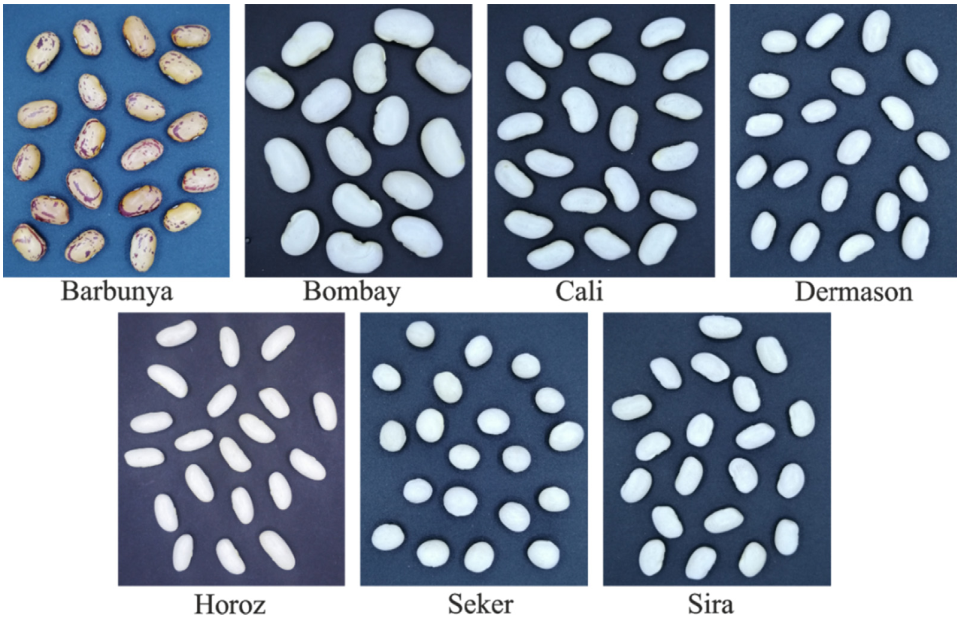

Referencia:
KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507

Dataset disponible en:
https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

In [2]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
# Cargar el conjunto de datos
df = pd.read_excel('/Users/JP/Documents/GitHub/Aprendizaje_maquinas/Trabajo_final_ML/DryBeanDataset/Dry_Bean_Dataset.xlsx')
# Verificar la carga
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [4]:
print("El dataset contiene {} filas y {} columnas".format(df.shape[0], df.shape[1]))

El dataset contiene 13611 filas y 17 columnas


# Análisis exploratorio de los datos

In [5]:
# Descripción de los atributos
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [6]:
# Codificación de la clase de fríjol y adición al dataset
df['Class_number'] = [1 if x == 'SEKER' else 
                      2 if x == 'BARBUNYA' else
                      3 if x == 'BOMBAY' else
                      4 if x == 'CALI' else
                      5 if x == 'DERMASON' else
                      6 if x == 'HOROZ' else
                      7 for x in df['Class']] 

In [7]:
print("El dataset contiene {} filas y {} columnas".format(df.shape[0], df.shape[1]))

El dataset contiene 13611 filas y 18 columnas


In [14]:
# Descripción de los atributos, NaN y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
 17  Class_number

<IPython.core.display.Javascript object>


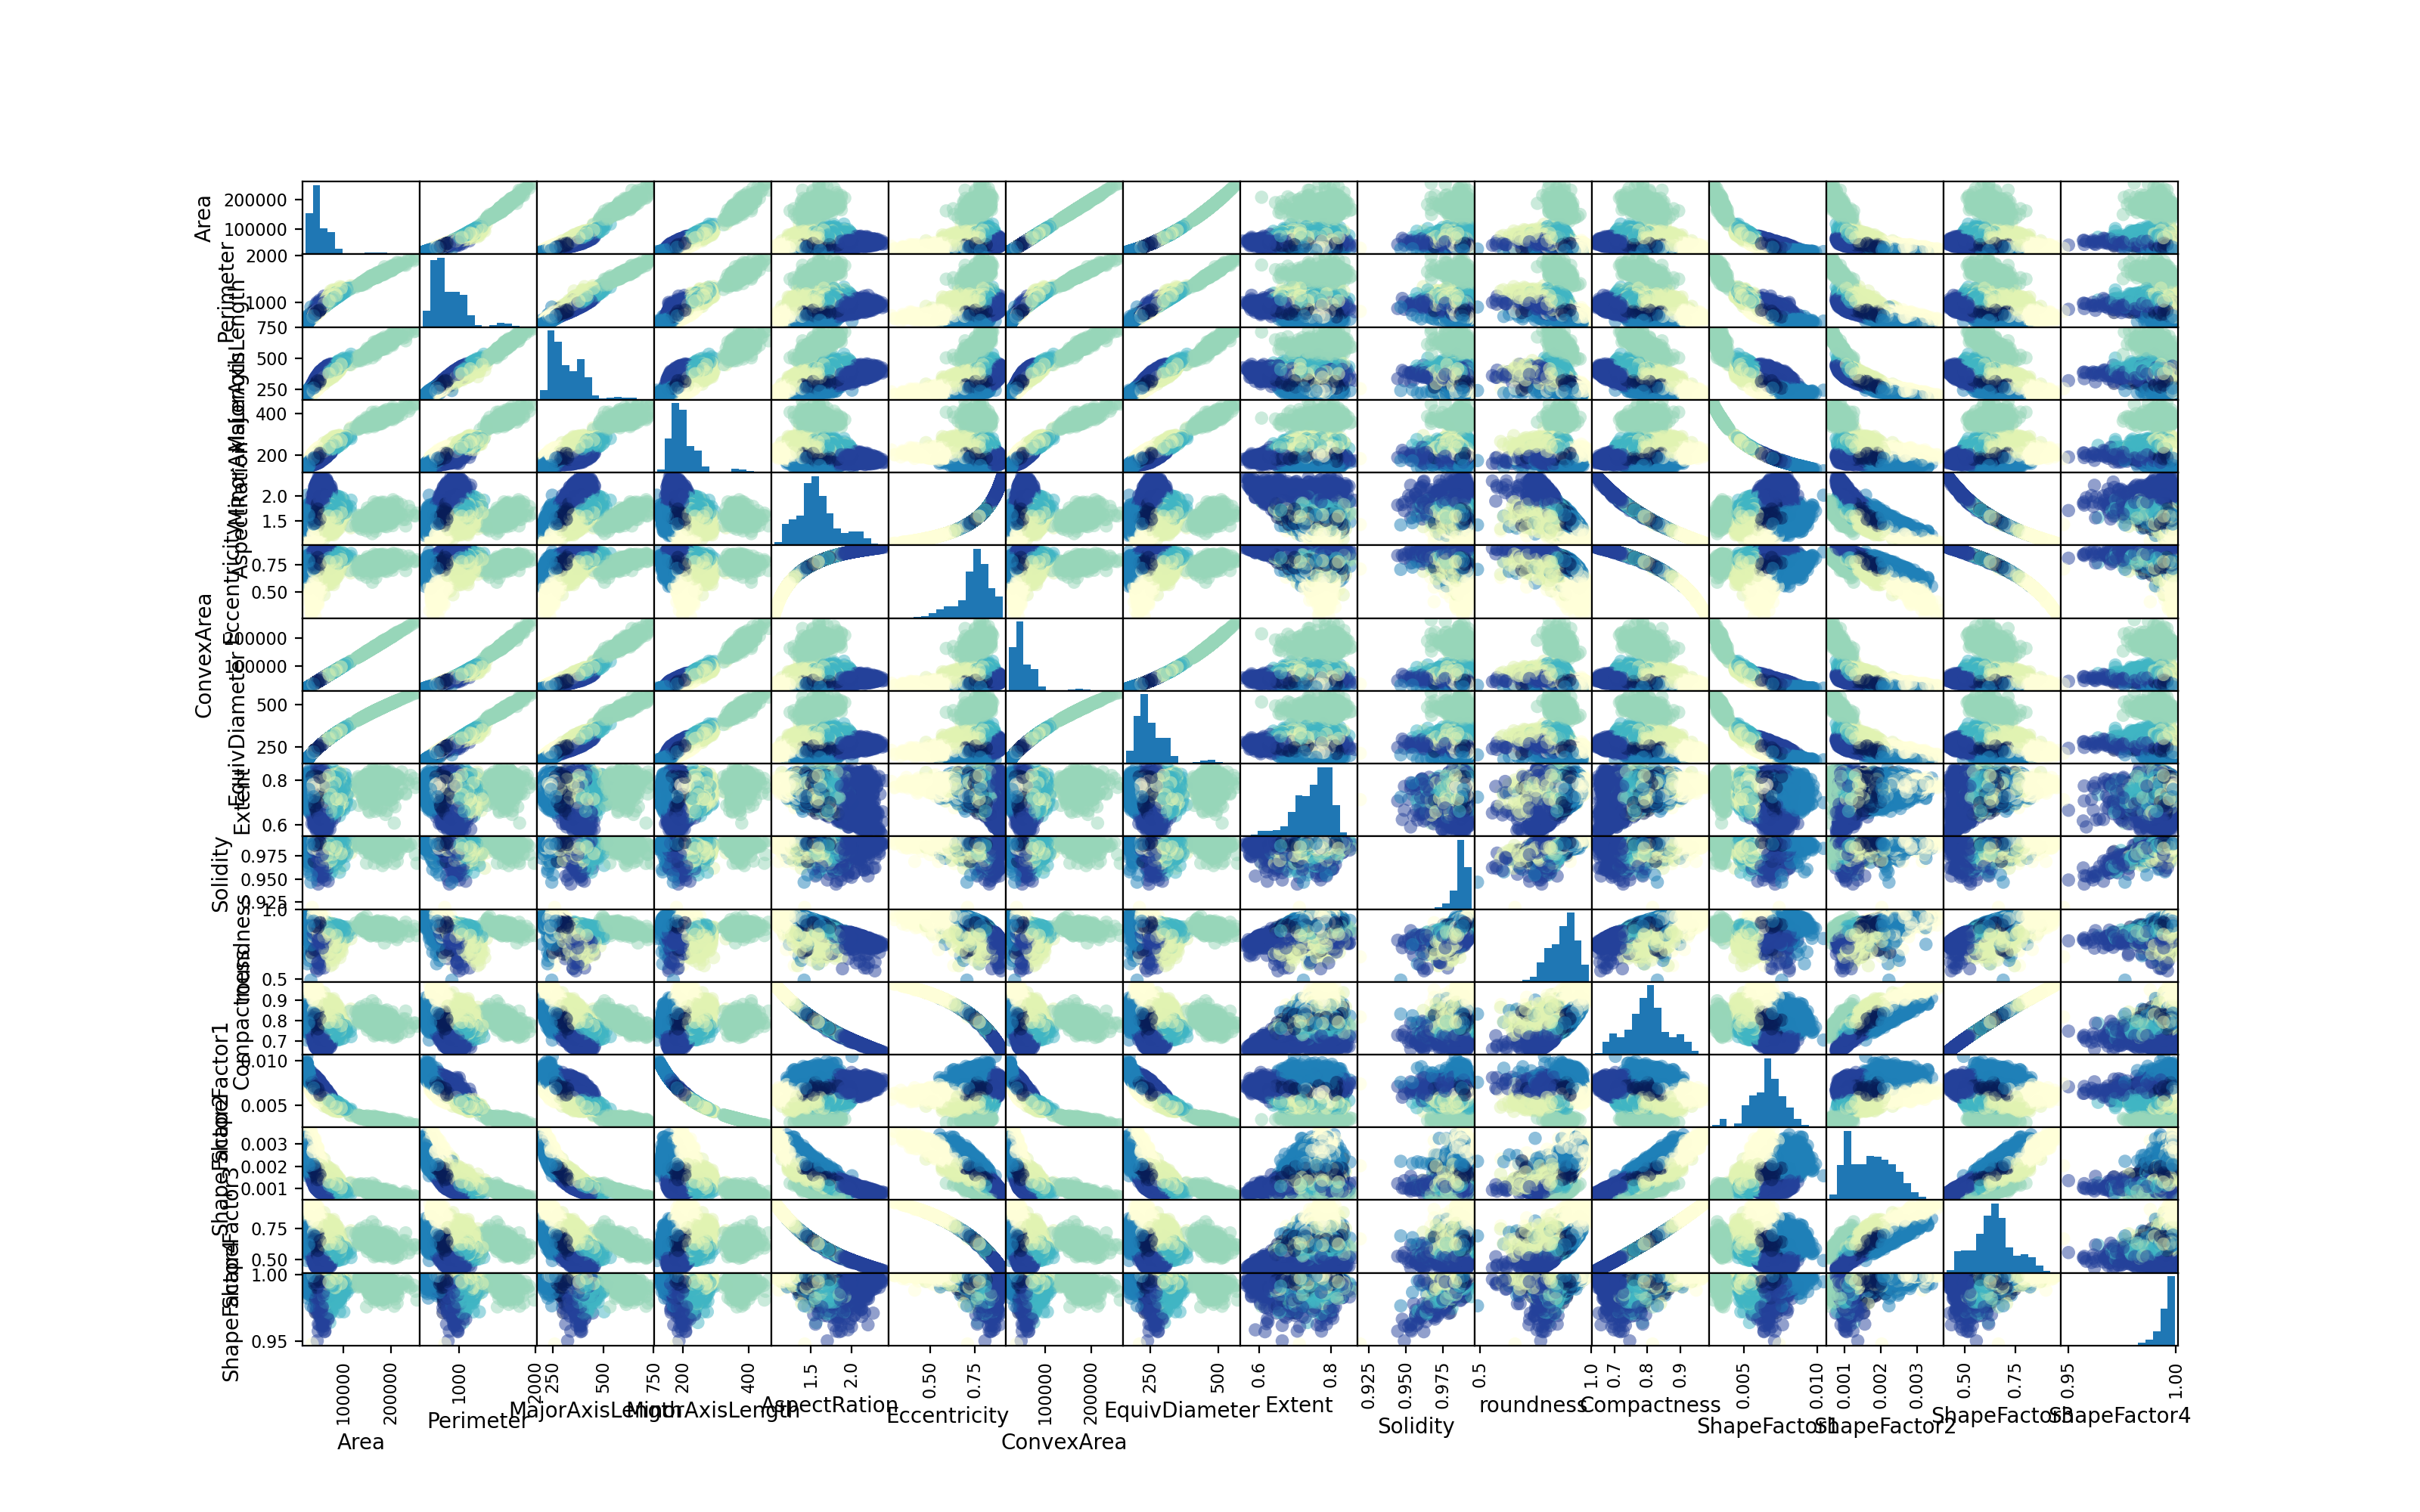

In [8]:
%matplotlib notebook
# plotting a scatter matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix

X = df[df.columns[:-1]]
y = df['Class_number']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('YlGnBu')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(16,10), cmap=cmap)

Debido al número de instancias, una matriz de correlación con "scatter" no es fácil de visualizar y se prefiere la matriz con heatmap

<IPython.core.display.Javascript object>


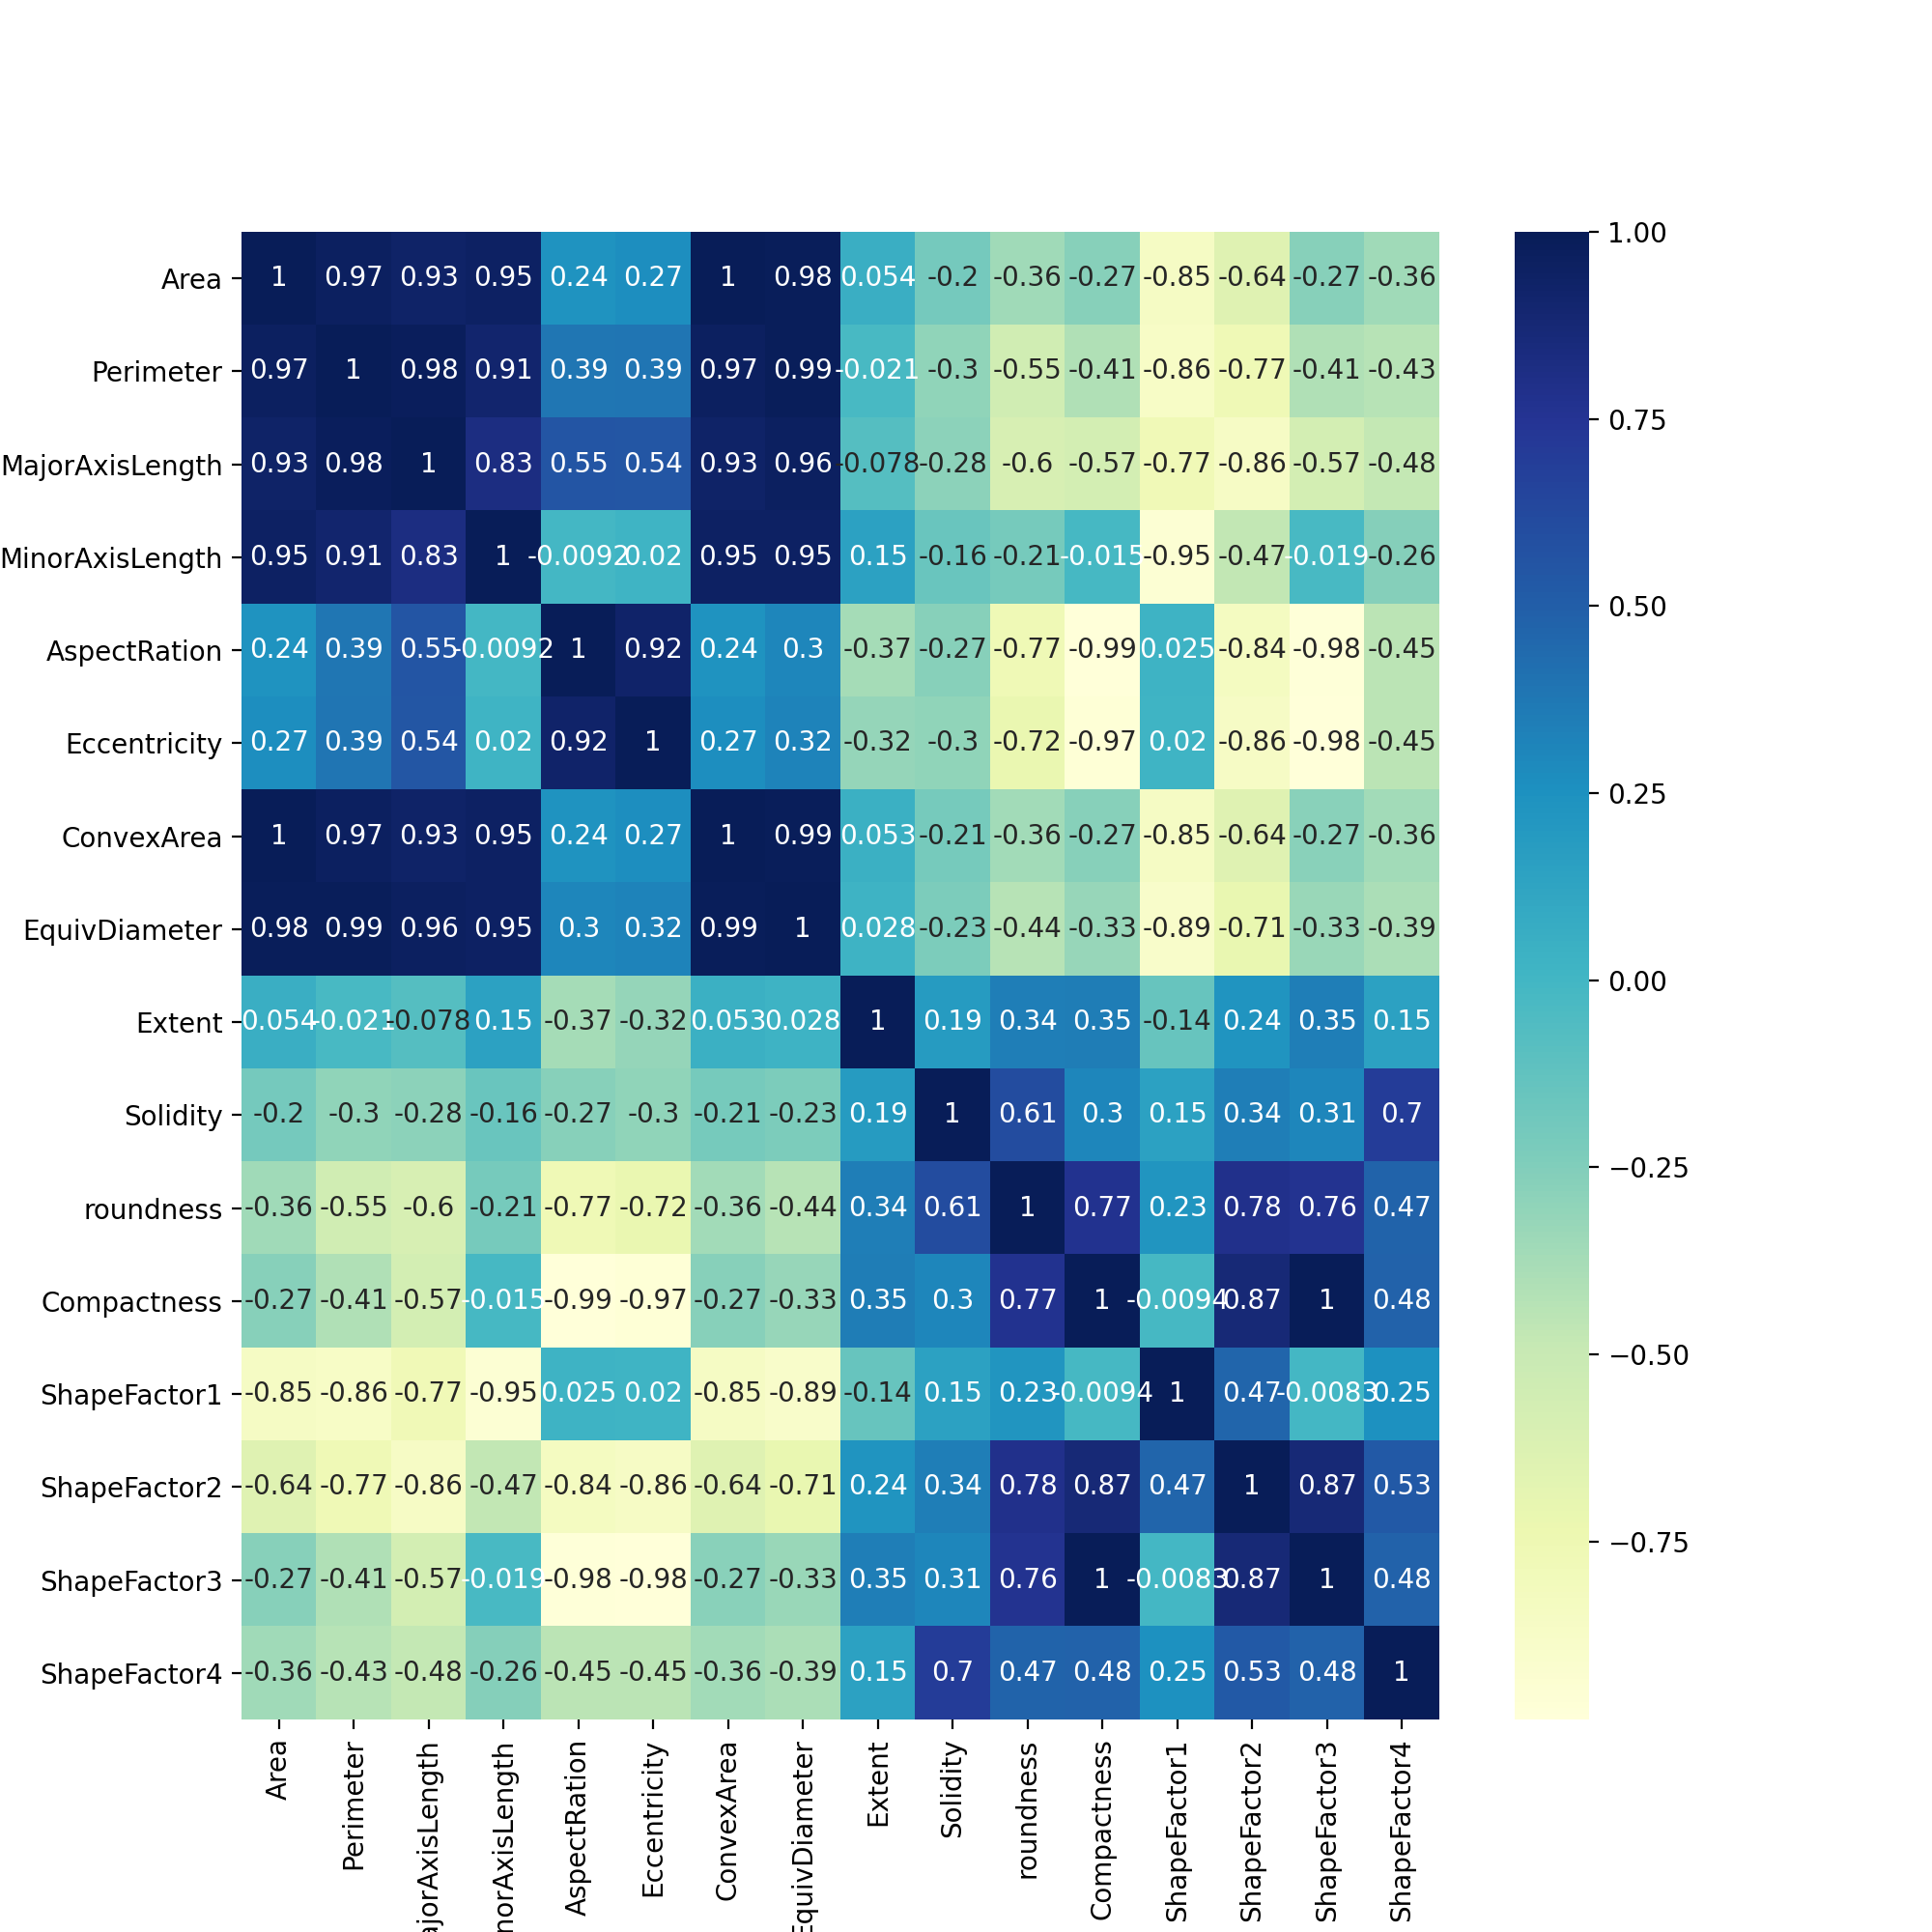

In [19]:
# Matriz de correlación heatmap
corr_matrix = X.corr()
fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(X.corr(), annot=True, cmap="YlGnBu");

Análisis de la matriz de correlación:
xxxxxx
xxxxxx

In [131]:
# Gráfico de cajas y bigotes

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [118]:
df2

Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0        610.291       208.178117       173.888747      1.197191   
1        638.018       200.524796       182.734419      1.097356   
2        624.110       212.826130       175.931143      1.209713   
3        645.884       210.557999       182.516516      1.153638   
4        620.134       201.847882       190.279279      1.060798   
...          ...              ...              ...           ...   
13606    759.696       288.721612       185.944705      1.552728   
13607    757.499       281.576392       190.713136      1.476439   
13608    759.321       281.539928       191.187979      1.472582   
13609    763.779       283.382636       190.275731      1.489326   
13610    772.237       295.142741       182.204716      1.619841   

       Eccentricity  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812     190.141097  0.763923  0.988856   0.958027   
1          0.411785     191.272750  0.783968  0.984986   0.887034   
2          0.562727     193.410904  0.778113  0.989559   0.947849   
3          0.498616     195.467062  0.782681  0.976696   0.903936   
4          0.333680     195.896503  0.773098  0.990893   0.984877   
...             ...            ...       ...       ...        ...   
13606      0.765002     231.515799  0.714574  0.990331   0.916603   
13607      0.735702     231.526798  0.799943  0.990752   0.922015   
13608      0.734065     231.631261  0.729932  0.989899   0.918424   
13609      0.741055     231.653248  0.705389  0.987813   0.907906   
13610      0.786693     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0         0.913358      0.007332      0.003147      0.834222      0.998724  
1         0.953861      0.006979      0.003564      0.909851      0.998430  
2         0.908774      0.007244      0.003048      0.825871      0.999066  
3         0.928329      0.007017      0.003215      0.861794      0.994199  
4         0.970516      0.006697      0.003665      0.941900      0.999166  
...            ...           ...           ...           ...           ...  
13606     0.801865      0.006858      0.001749      0.642988      0.998385  
13607     0.822252      0.006688      0.001886      0.676099      0.998219  
13608     0.822730      0.006681      0.001888      0.676884      0.996767  
13609     0.817457      0.006724      0.001852      0.668237      0.995222  
13610     0.784997      0.007001      0.001640      0.616221      0.998180  

[13611 rows x 14 columns]

In [61]:
columnas = []
for col in df.columns[:-2]:
    columnas.append(col)
print(columnas)

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
